<a href="https://colab.research.google.com/github/jananiarul1505/customer-churn-prediction/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy*100:.2f}%")


Random Forest Accuracy: 79.21%


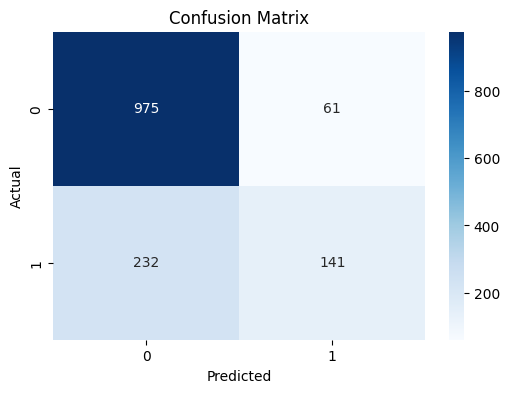

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.70      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



/tmp/ipython-input-3509447977.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


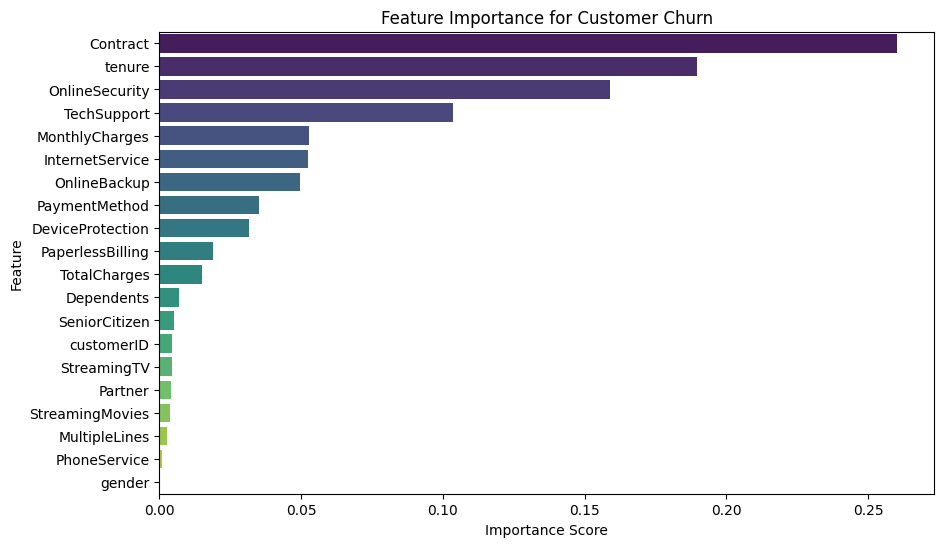

In [ ]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)\
                .sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")
plt.title("Feature Importance for Customer Churn")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


<Figure size 1800x1000 with 0 Axes>

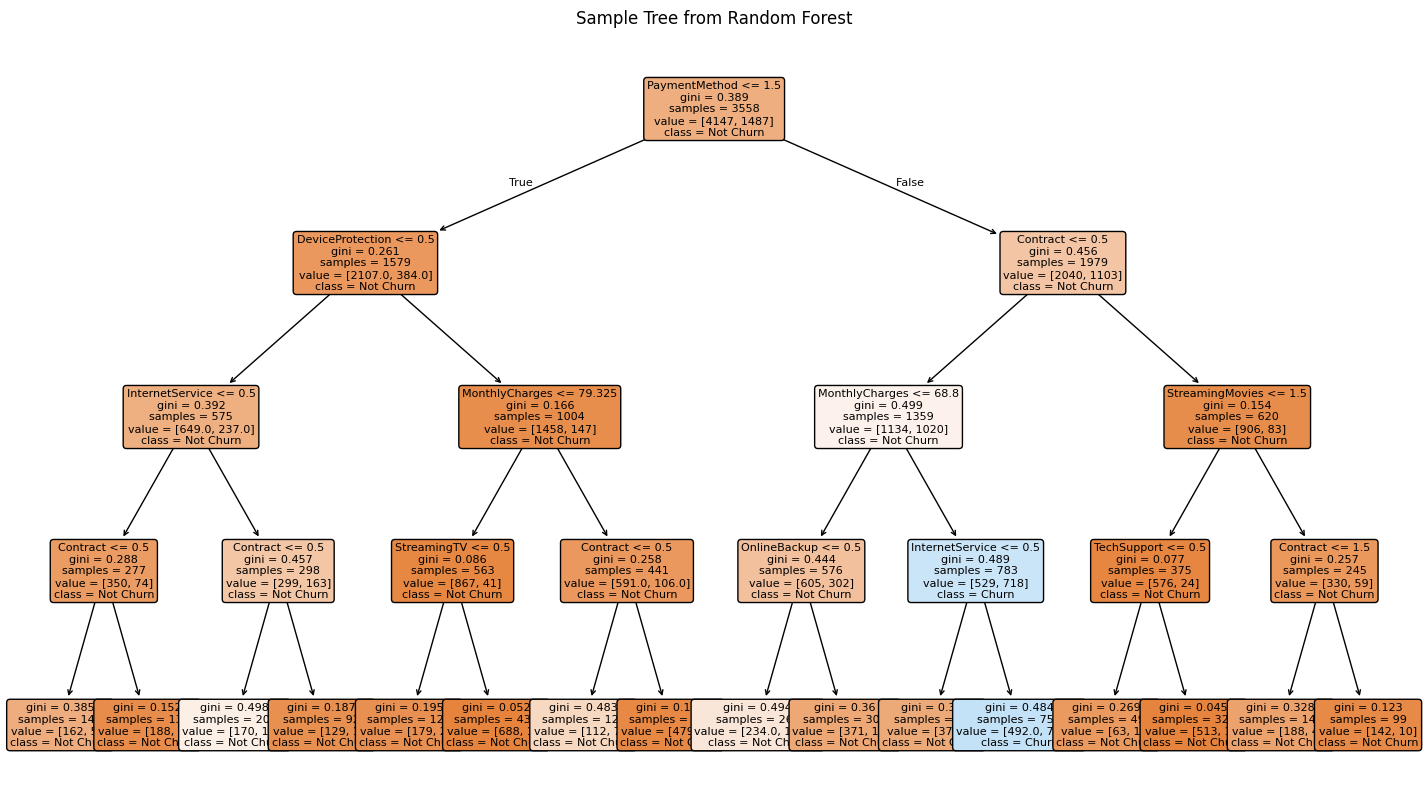

In [ ]:
plt.figure(figsize=(18,10))
single_tree = rf.estimators_[0]

plt.figure(figsize=(18, 10))
plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=["Not Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Sample Tree from Random Forest")
plt.show()

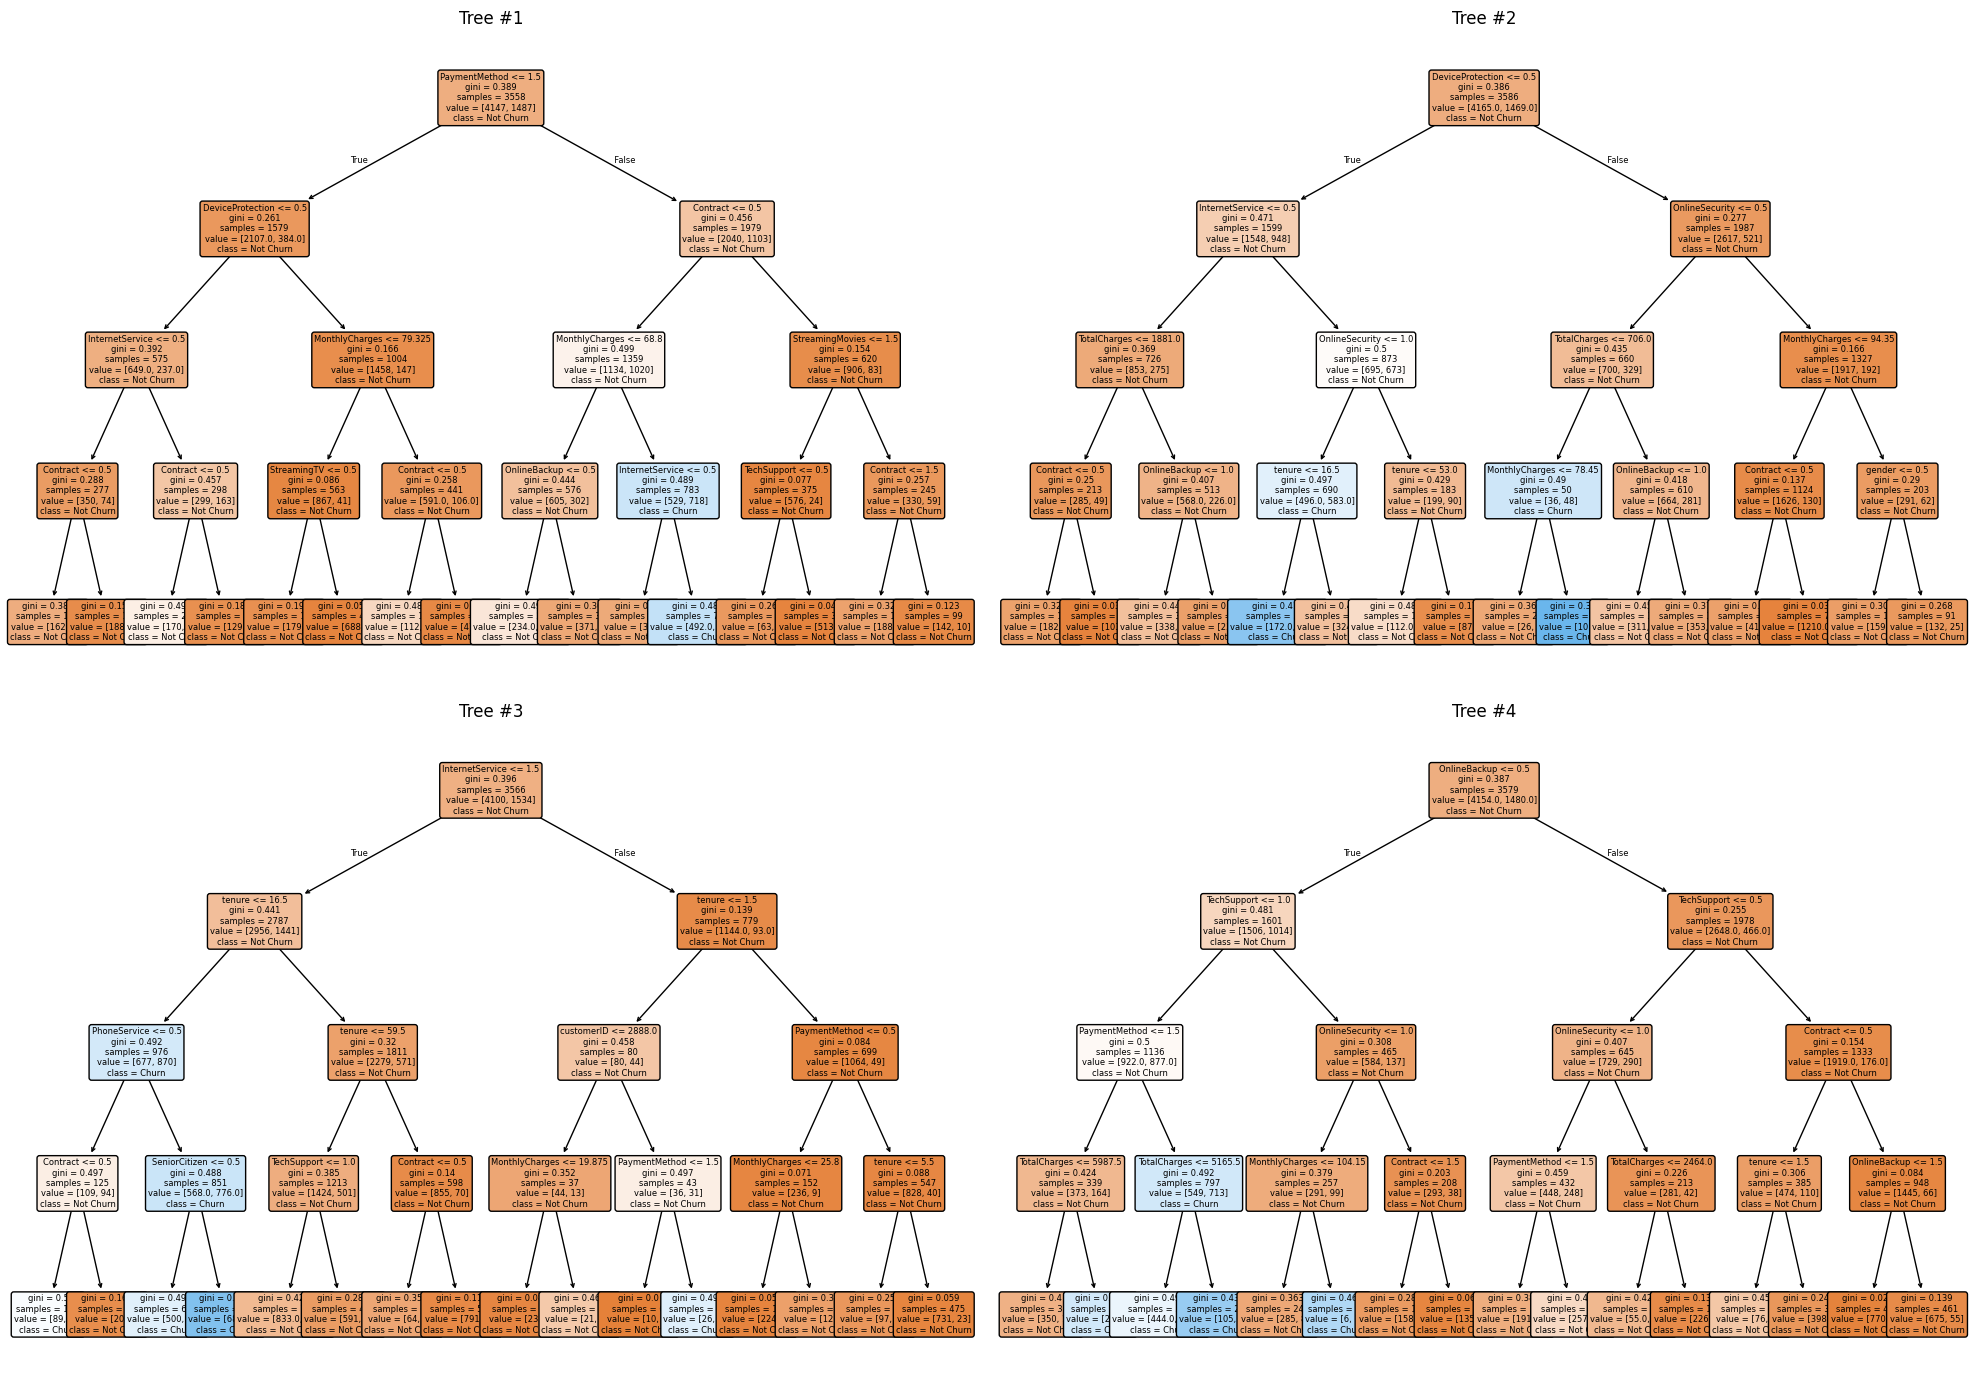

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

for i, ax in enumerate(axes.flatten()):
    tree = rf.estimators_[i]
    plot_tree(
        tree,
        feature_names=X.columns,
        class_names=["Not Churn", "Churn"],
        filled=True,
        rounded=True,
        fontsize=6,
        ax=ax
    )
    ax.set_title(f"Tree #{i+1}")

plt.tight_layout()
plt.show()
